**IE 6400 FUNDAMENTALS OF DATA ANALYTICS (GROUP - 8)**

***1)** YASH HARALE*

***2)** SAKSHI ARYAL*

***3)** SHRUTHI KASHETTY*

In [1]:
#Initialization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Data Preprocessing:

In [2]:
#Importing the Dataset
df = pd.read_csv('data.csv', encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
# Display the first few rows of the dataset
print(df.head())

# Check the data types and missing values in each column
print(df.info())

# Check for missing values
print(df.isnull().sum())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo   

In [4]:
# Drop rows with missing values
df.dropna(inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [5]:
# Convert 'InvoiceDate' column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [6]:
# Recheck data types and look for any anomalies
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   TotalPrice   401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB
None
            Quantity                    InvoiceDate      UnitPrice  \
count  401604.000000                         401604  401604.000000   
mean       12.183273  2011-07-10 12:08:23.848567552       3.474064   
min    -80995.000000            2010-12-01 08:26

RFM Calculation:

In [7]:
# Define the reference date as the latest date in the dataset
reference_date = df['InvoiceDate'].max()

# Group by CustomerID to calculate Recency, Frequency, and Monetary metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency: Days since last purchase
    'InvoiceNo': 'nunique',  # Frequency: Number of unique purchases
    'TotalPrice': 'sum'      # Monetary: Total spend
})

# Rename columns for easier reference
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Display the RFM table
print(rfm.head())

            Recency  Frequency  Monetary
CustomerID                              
12346.0         325          2      0.00
12347.0           1          7   4310.00
12348.0          74          4   1797.24
12349.0          18          1   1757.55
12350.0         309          1    334.40


RFM Segmentation:

In [8]:
# Assign scores based on quartiles for each RFM metric
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1], duplicates='drop')  # Lower recency is better
# Get the unique quantiles for Frequency
quantiles = pd.qcut(rfm['Frequency'], 4, duplicates='drop').cat.categories
num_quantiles = len(quantiles)  # Get the number of unique quantiles
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=range(1, num_quantiles + 1), duplicates='drop')  # Higher frequency is better
# Get the unique quantiles for Monetary
quantiles = pd.qcut(rfm['Monetary'], 4, duplicates='drop').cat.categories
num_quantiles = len(quantiles)  # Get the number of unique quantiles
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=range(1, num_quantiles + 1), duplicates='drop')  # Higher monetary is better

# Combine RFM scores to create a single RFM score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Display the RFM table with scores
print(rfm[['Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score']].head())

            Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score
CustomerID                                                                
12346.0         325          2      0.00       1       1       1       111
12347.0           1          7   4310.00       4       3       4       434
12348.0          74          4   1797.24       2       2       4       224
12349.0          18          1   1757.55       3       1       4       314
12350.0         309          1    334.40       1       1       2       112


Customer Segmentation:

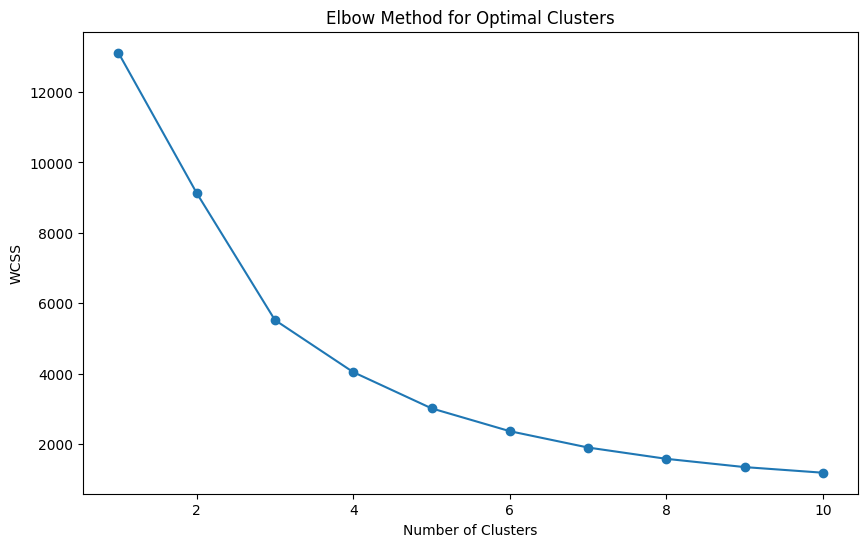

            Recency  Frequency       Monetary  CustomerCount
Cluster                                                     
0         41.606500   4.802461    1472.653251           3169
1        247.951242   1.805888     451.802991           1087
2          7.666667  89.000000  182108.075000              6
3          9.181818  40.672727   18435.663364            110


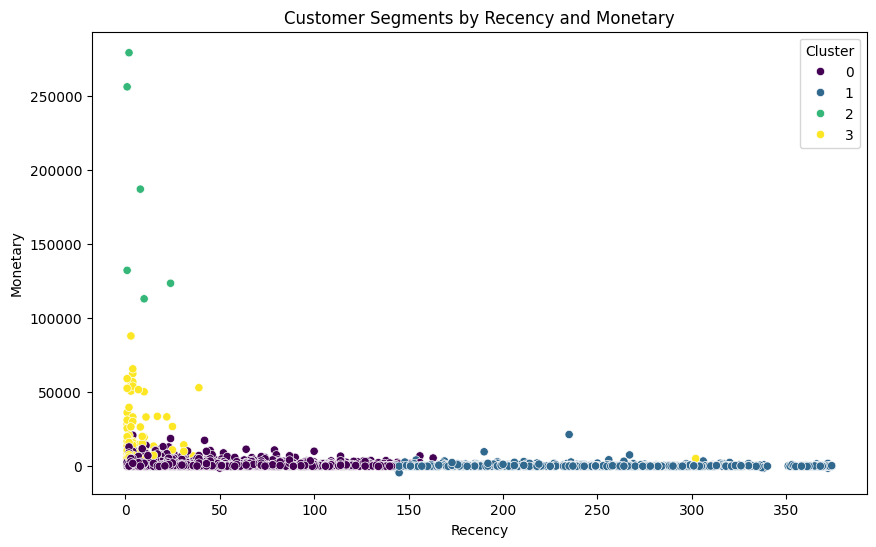

In [24]:
# Normalize RFM data
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(rfm_normalized)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Apply KMeans with the chosen number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42) 
rfm['Cluster'] = kmeans.fit_predict(rfm_normalized)

# Summarize clusters
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'RFM_Score': 'count'
}).rename(columns={'RFM_Score': 'CustomerCount'})

print(cluster_summary)

# Visualize clusters by Recency and Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rfm['Recency'], y=rfm['Monetary'], hue=rfm['Cluster'], palette='viridis')
plt.title('Customer Segments by Recency and Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()


Segment Profiling:

In [22]:
# Load the data
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Step 1: Recency Calculation
# Define the reference date for recency calculation (latest date in the dataset + 1)
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Calculate Recency for each customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Days since last purchase
    'InvoiceNo': 'nunique',  # Frequency: number of unique invoices
    'UnitPrice': lambda x: (x * df.loc[x.index, 'Quantity']).sum()  # Monetary: total spend
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'UnitPrice': 'Monetary'})

# Step 2: Assign RFM Scores
# Assign quartile scores for Recency, Frequency, and Monetary
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Combine RFM scores into a single RFM_Score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Step 3: Clustering (K-Means)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalize RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  # Adjust number of clusters if needed
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Step 4: Merge RFM Data with Original Dataset
data = df.merge(rfm, on='CustomerID')

print("RFM metrics calculated and clustering completed.")


RFM metrics calculated and clustering completed.


Cluster Profiles:
   Cluster     Recency   Frequency       Monetary  Customer_Count  \
0        0   29.700529    8.173346    2759.553108          288515   
1        1  232.752852    2.668168     833.435425           29982   
2        2    4.208687  162.693950  163977.905544           10959   
3        3    6.122360   70.862546   25572.771952           72148   

                              Cluster_Description  
0     High Recency, High Frequency, High Monetary  
1  Low Recency, High Frequency, Moderate Monetary  
2       High Recency, Low Frequency, Low Monetary  
3       High Recency, Low Frequency, Low Monetary  


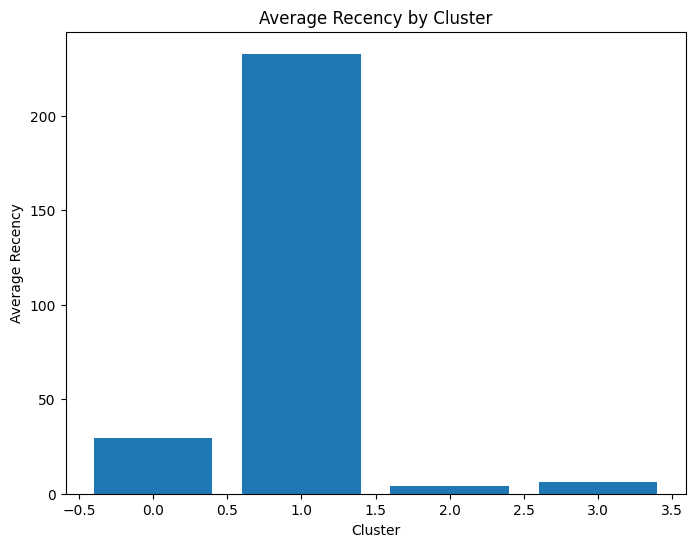

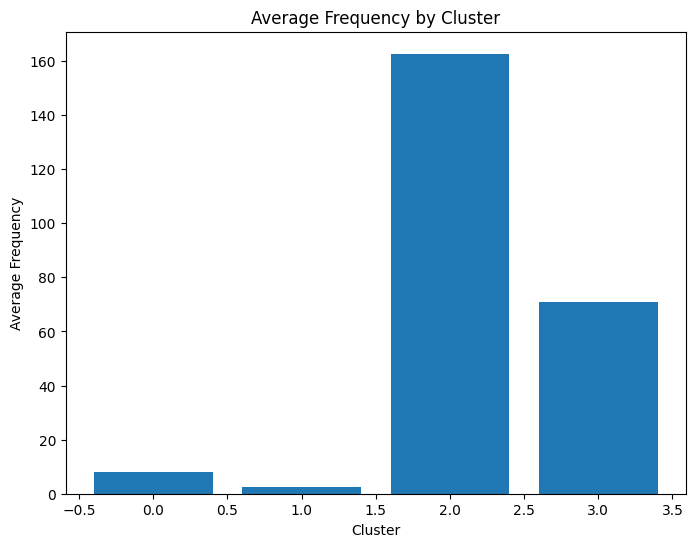

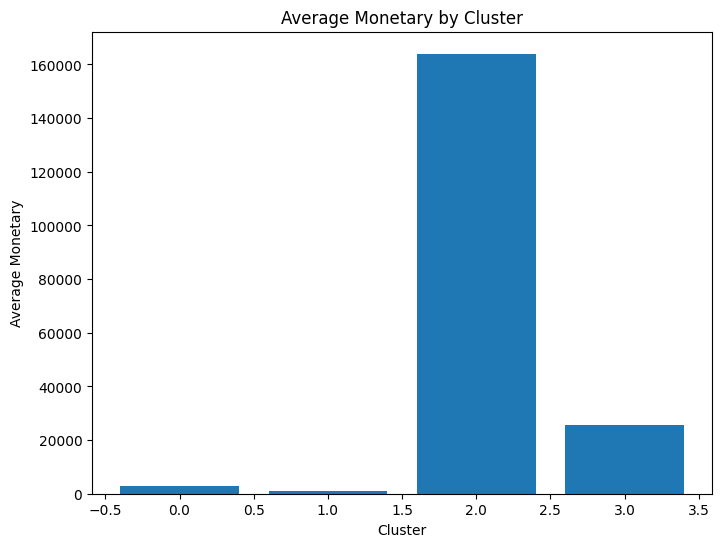

In [11]:
# Ensure the dataset contains the necessary clustering output
# Assumption: 'Cluster' column exists with customer segmentation results

# Step 1: Prepare RFM metrics (if not already present)
if 'Recency' not in data.columns or 'Frequency' not in data.columns or 'Monetary' not in data.columns:
    print("Please calculate RFM metrics and cluster labels first.")

# Step 2: Analyze Each Cluster
# Group by 'Cluster' to analyze the average RFM metrics and customer distribution
cluster_profiles = data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'  # Count of customers in each cluster
}).rename(columns={'CustomerID': 'Customer_Count'}).reset_index()

# Add Cluster Descriptions (Example descriptions; customize as per your data)
cluster_profiles['Cluster_Description'] = [
    'High Recency, High Frequency, High Monetary' if x == 0 else
    'Low Recency, High Frequency, Moderate Monetary' if x == 1 else
    'High Recency, Low Frequency, Low Monetary'
    for x in cluster_profiles['Cluster']
]

# Display the Cluster Profiles
print("Cluster Profiles:")
print(cluster_profiles)

# Optional: Save the cluster profiles for reporting
cluster_profiles.to_csv('cluster_profiles.csv', index=False)

# Step 3: Visualize Cluster Profiles
import matplotlib.pyplot as plt

# Plot RFM metrics for each cluster
metrics = ['Recency', 'Frequency', 'Monetary']
for metric in metrics:
    plt.figure(figsize=(8, 6))
    plt.bar(cluster_profiles['Cluster'], cluster_profiles[metric])
    plt.title(f'Average {metric} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Average {metric}')
    plt.xticks(rotation=0)
    plt.show()

Marketing Recommendations:

Here are some paraphrased recommendations for common RFM segments:

**1. Champions:**
* Reward loyalty with exclusive perks and early access.
* Show appreciation through personalized gestures.

**2. Loyal Customers:**
* Encourage repeat purchases with upselling and cross-selling.
* Leverage their influence with referral programs.
* Offer value-added services like subscription plans.

**3. Potential Loyalists:**
* Welcome them warmly and guide them towards more purchases.
* Offer incentives to solidify their loyalty.

**4. At-Risk Customers:**
* Rekindle their interest with exclusive offers and personalized communication.
* Actively seek feedback to understand their needs.
* Remind them of your brand's unique value.

**5. Hibernating Customers:**
* Reactivate them with targeted ads and email campaigns.
* Incentivize larger purchases with bundled offers.
* Excite them with new and trending products.

**6. Lost Customers:**
* Win them back with personalized offers and heartfelt messages.
* Provide extra value to entice them to return.
* Understand their reasons for leaving to improve future strategies.


In [20]:
# Step 1: Review Cluster Profiles
print(cluster_profiles)

# Step 2: Define Recommendations for Each Cluster
cluster_recommendations = {
    0: "Champions: Reward with loyalty programs, early product access, and personalized thank-you notes.",
    1: "Loyal Customers: Encourage with bulk purchase discounts, referral incentives, and upselling opportunities.",
    2: "Potential Loyalists: Engage with welcome emails, onboarding materials, and limited-time offers.",
    3: "At-Risk Customers: Reconnect through exclusive re-engagement campaigns, surveys, and tailored offers.",
    4: "Hibernating Customers: Rekindle interest with retargeting ads, discounted bundles, and trending product highlights."
}

# Print Recommendations for Each Cluster
for cluster, recommendation in cluster_recommendations.items():
    print(f"Cluster {cluster}: {recommendation}")

   Cluster     Recency   Frequency       Monetary  Customer_Count  \
0        0   29.700529    8.173346    2759.553108          288515   
1        1  232.752852    2.668168     833.435425           29982   
2        2    4.208687  162.693950  163977.905544           10959   
3        3    6.122360   70.862546   25572.771952           72148   

                              Cluster_Description  
0     High Recency, High Frequency, High Monetary  
1  Low Recency, High Frequency, Moderate Monetary  
2       High Recency, Low Frequency, Low Monetary  
3       High Recency, Low Frequency, Low Monetary  
Cluster 0: Champions: Reward with loyalty programs, early product access, and personalized thank-you notes.
Cluster 1: Loyal Customers: Encourage with bulk purchase discounts, referral incentives, and upselling opportunities.
Cluster 2: Potential Loyalists: Engage with welcome emails, onboarding materials, and limited-time offers.
Cluster 3: At-Risk Customers: Reconnect through exclusive re-

Visualization:

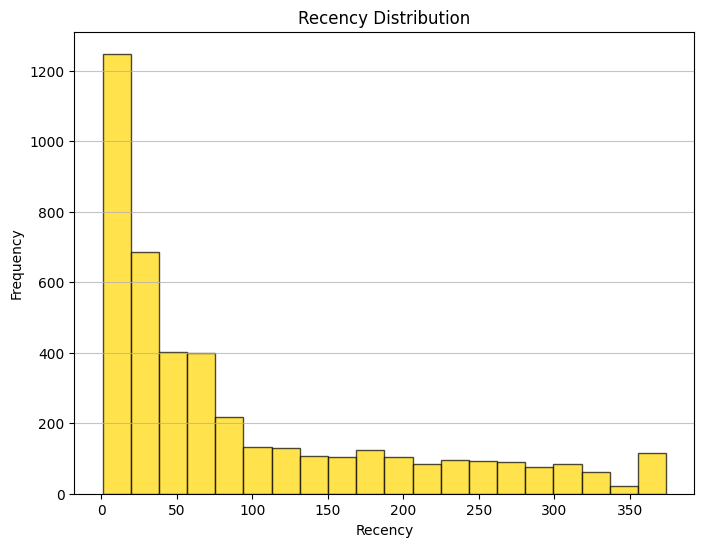

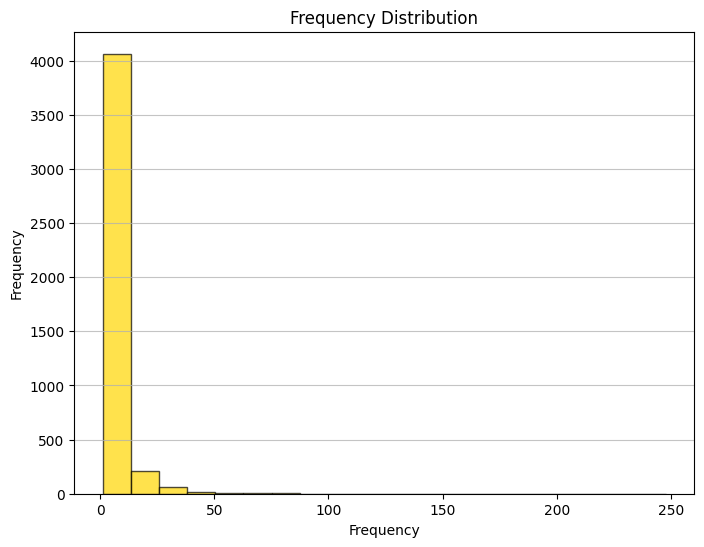

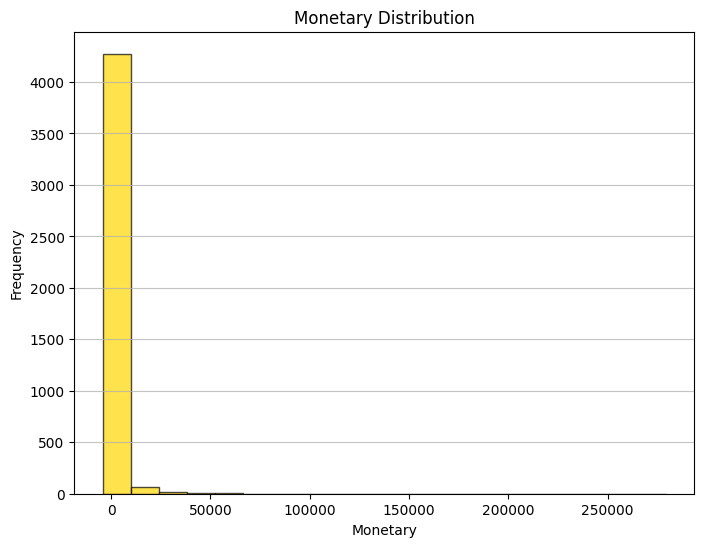

In [13]:
# Ensure the dataset has the required RFM and Cluster columns
if 'Cluster' not in rfm.columns:
    print("Please ensure the 'Cluster' column exists after performing clustering.")

# Bar Charts for RFM Distributions
metrics = ['Recency', 'Frequency', 'Monetary']
for metric in metrics:
    plt.figure(figsize=(8, 6))
    plt.hist(rfm[metric], bins=20, alpha=0.7, color='gold', edgecolor='black')
    plt.title(f'{metric} Distribution')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

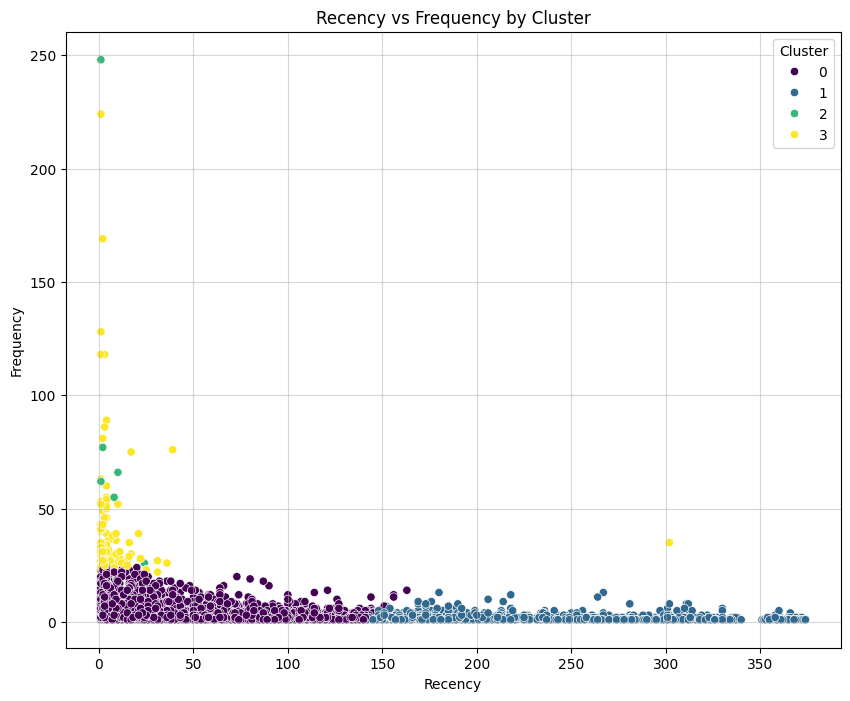

In [14]:
# Ensure the dataset has the required RFM and Cluster columns
if 'Cluster' not in rfm.columns:
    print("Please ensure the 'Cluster' column exists after performing clustering.")

    # Scatter Plots for Cluster Visualization
# Recency vs. Frequency colored by cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Cluster', palette='viridis')
plt.title('Recency vs Frequency by Cluster')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.grid(alpha=0.5)
plt.show()

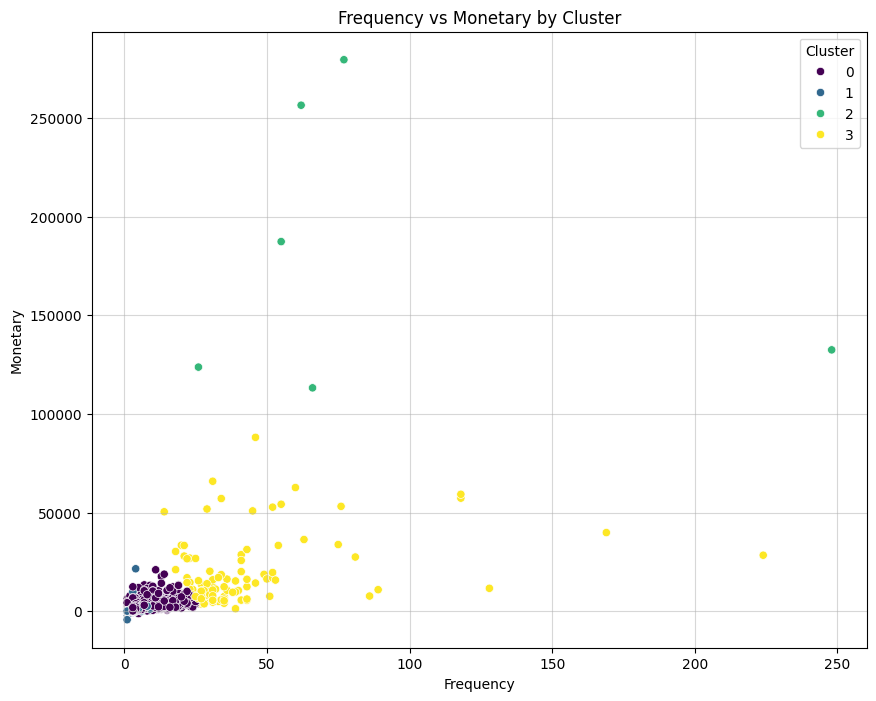

In [15]:
# Ensure the dataset has the required RFM and Cluster columns
if 'Cluster' not in rfm.columns:
    print("Please ensure the 'Cluster' column exists after performing clustering.")

# Frequency vs. Monetary colored by cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='viridis')
plt.title('Frequency vs Monetary by Cluster')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend(title='Cluster')
plt.grid(alpha=0.5)
plt.show()

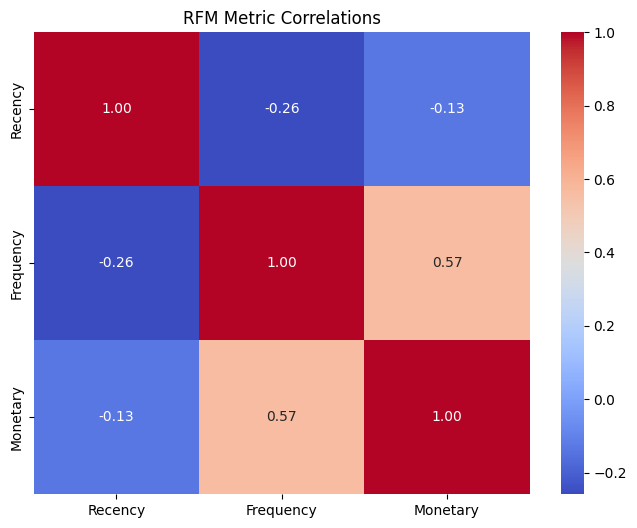

In [16]:
# Ensure the dataset has the required RFM and Cluster columns
if 'Cluster' not in rfm.columns:
    print("Please ensure the 'Cluster' column exists after performing clustering.")

# Heatmap for RFM Correlations
plt.figure(figsize=(8, 6))
correlation_matrix = rfm[['Recency', 'Frequency', 'Monetary']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('RFM Metric Correlations')
plt.show()

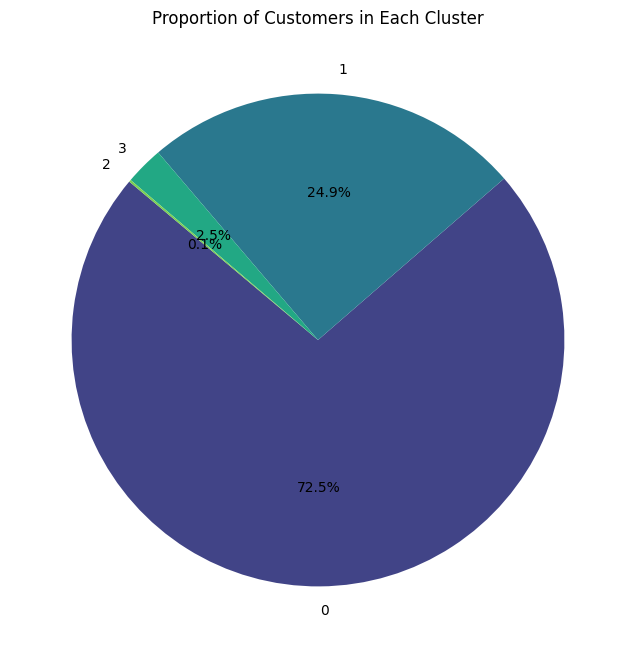

In [17]:
# Pie Chart of Cluster Sizes
plt.figure(figsize=(8, 8))
cluster_sizes = rfm['Cluster'].value_counts()
plt.pie(cluster_sizes, labels=cluster_sizes.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(cluster_sizes)))
plt.title('Proportion of Customers in Each Cluster')
plt.show()

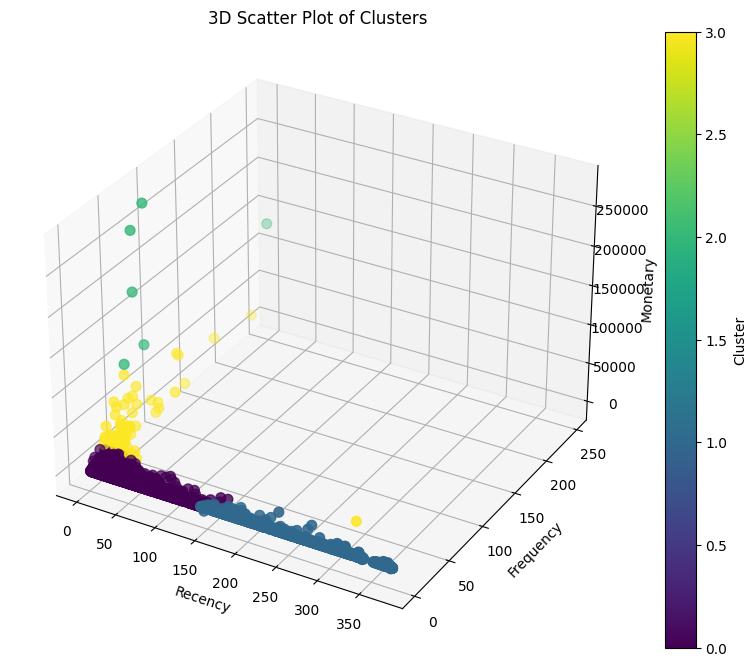

In [18]:
# 3D Scatter Plot of Clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], c=rfm['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D Scatter Plot of Clusters')
plt.colorbar(sc, label='Cluster')
plt.show()

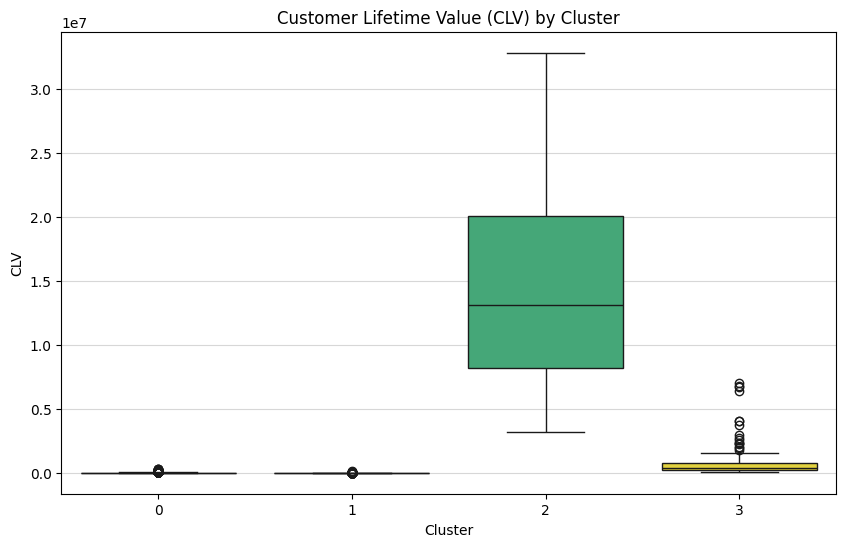

In [21]:
# Calculate CLV (Monetary x Frequency as a proxy)
rfm['CLV'] = rfm['Monetary'] * rfm['Frequency']

# Boxplot of CLV by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=rfm, x='Cluster', y='CLV', hue='Cluster', palette='viridis', dodge=False, legend=False)
plt.title('Customer Lifetime Value (CLV) by Cluster')
plt.xlabel('Cluster')
plt.ylabel('CLV')
plt.grid(axis='y', alpha=0.5)
plt.show()

Documentation: